## Question #1 (50 points)

***This question consists of plotting and a conceptual question. Pull code from homework and midterms to optimize your effort.***

For the following potential energy for anharmonically coupled oscillators, create a figure that superimposes

* a contour plot of the potential energy, and;
* the trajectory of $Q_1$ and $Q_2$.

### Point breakdown

* Contour plot (20 points)
* Trajectory plot (20 points)
* Physical explanation (10 points)

### The potential energy

$$ \Delta U = \frac{1}{2} K_1 Q_1^2 + \frac{1}{2} K_2 Q_2^2 + \frac{1}{3} C Q_1 Q_2^2 $$

### Constrained parameters and initial conditions

Take $K_1 = 1$, $K_2 = 0.2$, $M_1 = M_2 = 1$, and $C=0.5$. For the initial conditions, take $Q_1(0) = 0$, $Q_2(0) = 1$, and both velocities starting at zero.

### Plotting constraints
Plot $Q_1$ and $Q_2$ on the horizontal and vertical axes, respectively. I suggest a meshgrid of at least $100 \times 100$ points.

For your contour plot, combine `plt.contour` and `plt.contourf` with code similar to the following:

* `plt.contourf(Q1_grid, Q2_grid, U_grid, levels=50, cmap='viridis')`
* `plt.contour(Q1_grid, Q2_grid, U_grid, levels=50, colors='white', linewidths=1)`

Also, use `plt.xlim(-1.5, 1.5)` and `plt.ylim(-1.5, 1.5)`

Don't forget to label your axes.

### Getting and plotting the trajectory

To get the trajectory, you will need to set up and solve the equations of motion, as we did in previous homework and in class. Then you can plot $Q_2$ versus $Q_1$ with `matplotlib` using a line of code similar to `plt.plot(Q1, Q2, color='red', label="Trajectory")`.

Plot the trajectory from $t=0$ to $t=50$, with an appropriate choice of mesh points to ensure the trajectory is resolved. (e.g. `t_mesh = np.linspace(0, 50, 200)`)

### Physical explanation

With your code complete, you can test four cases for the initial conditions (all with the initial velocity set to zero):

1. $Q_1(0) = 0$, $Q_2(0) = 1$ (**submit this plot**)
2. $Q_1(0) = 0$, $Q_2(0) = -1$
3. $Q_1(0) = 1$, $Q_2(0) = 0$
4. $Q_1(0) = -1$, $Q_2(0) = 0$

Why do the dynamics differ when only $Q_1$ is initially displaced compared to when only $Q_2$ is initially displaced? How does this relate to the coupling term in the potential energy? What is the physical interpretation? You could use our cylindrical beam example from class to describe this, if you like.


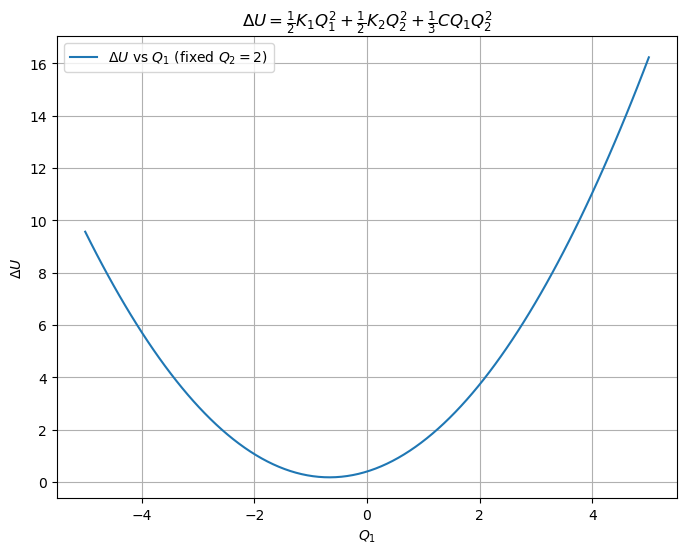

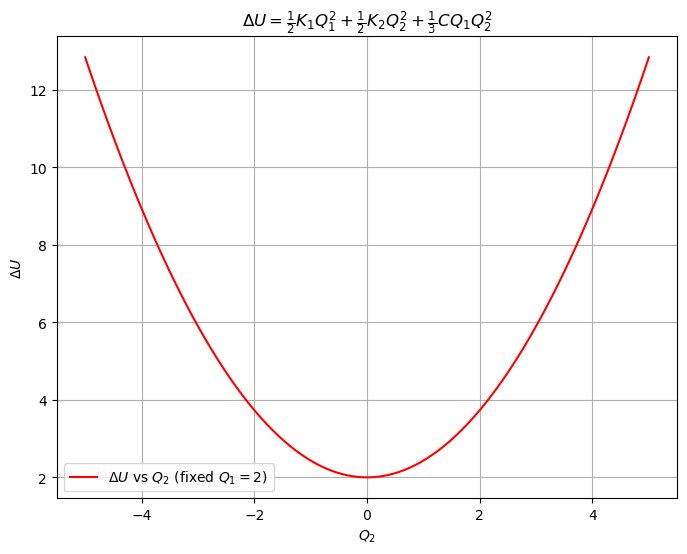

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Constants (You can change these values)
K1 = 1.0
K2 = 0.2
C = .5

# Define the equation for Delta U
def delta_U(Q1, Q2):
    return 0.5 * K1 * Q1**2 + 0.5 * K2 * Q2**2 + (1/3) * C * Q1 * Q2**2

# Option 1: Fix Q2 = 2 and plot Delta U vs Q1
Q1_values = np.linspace(-5, 5, 100)
Q2_fixed = 2
Delta_U_Q1 = delta_U(Q1_values, Q2_fixed)

plt.figure(figsize=(8, 6))
plt.plot(Q1_values, Delta_U_Q1, label=r'$\Delta U$ vs $Q_1$ (fixed $Q_2 = 2$)')
plt.xlabel(r'$Q_1$')
plt.ylabel(r'$\Delta U$')
plt.title(r'$\Delta U = \frac{1}{2} K_1 Q_1^2 + \frac{1}{2} K_2 Q_2^2 + \frac{1}{3} C Q_1 Q_2^2$')
plt.legend()
plt.grid(True)
plt.show()

# Option 2: Fix Q1 = 2 and plot Delta U vs Q2
Q2_values = np.linspace(-5, 5, 100)
Q1_fixed = 2
Delta_U_Q2 = delta_U(Q1_fixed, Q2_values)

plt.figure(figsize=(8, 6))
plt.plot(Q2_values, Delta_U_Q2, label=r'$\Delta U$ vs $Q_2$ (fixed $Q_1 = 2$)', color='r')
plt.xlabel(r'$Q_2$')
plt.ylabel(r'$\Delta U$')
plt.title(r'$\Delta U = \frac{1}{2} K_1 Q_1^2 + \frac{1}{2} K_2 Q_2^2 + \frac{1}{3} C Q_1 Q_2^2$')
plt.legend()
plt.grid(True)
plt.show()



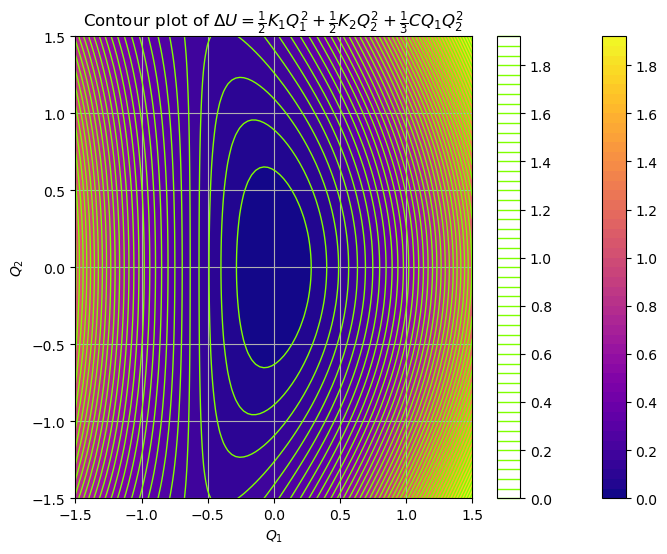

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Constants (You can change these values)
K1 = 1.0
K2 = 0.2
C = .5

# Define the equation for Delta U
def delta_U(Q1, Q2):
    return 0.5 * K1 * Q1**2 + 0.5 * K2 * Q2**2 + (1/3) * C * Q1 * Q2**2

# Create a meshgrid for Q1 and Q2
Q1 = np.linspace(-1.5, 1.5, 100)
Q2 = np.linspace(-1.5, 1.5, 100)
Q1, Q2 = np.meshgrid(Q1, Q2)

# Calculate Delta U on the meshgrid
Delta_U = delta_U(Q1, Q2)

# Create a contour plot
plt.figure(figsize=(8, 6))
cp = plt.contourf(Q1, Q2, Delta_U, 50, cmap='plasma')
cp2 = plt.contour(Q1, Q2, Delta_U, levels=50, colors='chartreuse', linewidths=1)


# Add labels and title
plt.xlabel(r'$Q_1$')
plt.ylabel(r'$Q_2$')
plt.title(r'Contour plot of $\Delta U = \frac{1}{2} K_1 Q_1^2 + \frac{1}{2} K_2 Q_2^2 + \frac{1}{3} C Q_1 Q_2^2$')

# Add a color bar to show the values of Delta U
plt.colorbar(cp)
plt.colorbar(cp2)

# Set the x and y axis limits
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)

# Show the plot
plt.grid(True)
plt.show()


trejectory plot (work on this more)

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

def rk2_system(Q0, v0, t_end, dt):
    # Constants
    K1 = 1.0  # Spring constant for Q1
    K2 = 0.2  # Spring constant for Q2
    M1 = 1.0  # Mass of Q1
    M2 = 1.0  # Mass of Q2
    C = 0.5   # Damping coefficient

    # Initial conditions for Q1 and Q2
    Q1 = Q0
    Q2 = Q0  # Assume Q1 and Q2 start at the same value
    v1 = v0  # Initial velocity for Q1
    v2 = v0  # Initial velocity for Q2

    # Time steps
    t_vals = np.arange(0, t_end, dt)
    Q1_vals = np.zeros(len(t_vals))
    Q2_vals = np.zeros(len(t_vals))
    v1_vals = np.zeros(len(t_vals))
    v2_vals = np.zeros(len(t_vals))
    
    Q1_vals[0] = Q1
    Q2_vals[0] = Q2
    v1_vals[0] = v1
    v2_vals[0] = v2
    
    # Define the forces (negative gradients of Delta U)
    def forces(Q1, Q2):
        F1 = -(K1 * Q1 + (1/3) * C * Q2**2)
        F2 = -(K2 * Q2 + (2/3) * C * Q1 * Q2)
        return F1, F2
    
    for i in range(1, len(t_vals)):
        # First slopes (k1)
        k1_Q1 = v1_vals[i-1]
        k1_Q2 = v2_vals[i-1]
        k1_v1, k1_v2 = forces(Q1_vals[i-1], Q2_vals[i-1])
        
        # Intermediate estimates
        Q1_mid = Q1_vals[i-1] + k1_Q1 * dt / 2
        Q2_mid = Q2_vals[i-1] + k1_Q2 * dt / 2
        v1_mid = v1_vals[i-1] + k1_v1 * dt / 2
        v2_mid = v2_vals[i-1] + k1_v2 * dt / 2
        
        # Second slopes (k2)
        k2_Q1 = v1_mid
        k2_Q2 = v2_mid
        k2_v1, k2_v2 = forces(Q1_mid, Q2_mid)
        
        # Update the values
        Q1_vals[i] = Q1_vals[i-1] + k2_Q1 * dt
        Q2_vals[i] = Q2_vals[i-1] + k2_Q2 * dt
        v1_vals[i] = v1_vals[i-1] + k2_v1 * dt
        v2_vals[i] = v2_vals[i-1] + k2_v2 * dt
    
    return t_vals, Q1_vals, Q2_vals, v1_vals, v2_vals

def plot_rk2_system(Q0=1, v0=0, t_end=10, dt=0.1):
    t_vals, Q1_vals, Q2_vals, v1_vals, v2_vals = rk2_system(Q0, v0, t_end, dt)
    
    # Plot position and velocity of Q1 and Q2
    plt.plot(t_vals, Q1_vals, label="Q1 Position", color='blue')
    plt.plot(t_vals, Q2_vals, label="Q2 Position", color='green')
    plt.plot(t_vals, v1_vals, label="Q1 Velocity", linestyle="dashed", color='blue')
    plt.plot(t_vals, v2_vals, label="Q2 Velocity", linestyle="dashed", color='green')
    
    plt.xlabel('Time')
    plt.ylabel('Q(t), v(t)')
    plt.legend()
    plt.title(f"System Simulation with RK2 (dt={dt})")
    plt.show()

# Interactive plot with ipywidgets
interact(plot_rk2_system,
         Q0=FloatSlider(value=1.0, min=-0.5, max=0.5, step=0.1, description='$Q(0)$'),
         v0=FloatSlider(value=0.0, min=-0.5, max=0.5, step=0.1, description='$\\dot{Q}(0)$'),
         t_end=FloatSlider(value=10.0, min=1.0, max=50.0, step=0.1, description='$t_{end}$'),
         dt=FloatSlider(value=0.1, min=0.01, max=1.0, step=0.01, description='$dt$')
)



interactive(children=(FloatSlider(value=0.5, description='$Q(0)$', max=0.5, min=-0.5), FloatSlider(value=0.0, …

<function __main__.plot_rk2_system(Q0=1, v0=0, t_end=10, dt=0.1)>

1. $Q_1(0) = 0$, $Q_2(0) = 1$ (**submit this plot**)
2. $Q_1(0) = 0$, $Q_2(0) = -1$
3. $Q_1(0) = 1$, $Q_2(0) = 0$
4. $Q_1(0) = -1$, $Q_2(0) = 0$


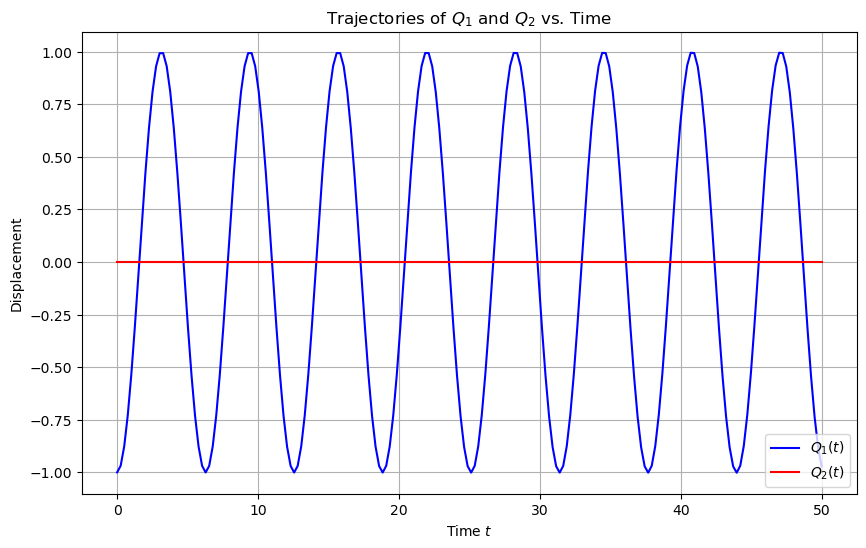

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Constants
K1 = 1.0
K2 = .2
C = 0.5

# Define the system of equations
def equations(t, y):
    Q1, Q2, dQ1, dQ2 = y
    ddQ1 = -K1 * Q1 - C * Q2**2
    ddQ2 = -K2 * Q2 - 2 * C * Q1 * Q2
    return [dQ1, dQ2, ddQ1, ddQ2]

# Initial conditions: Q1(0), Q2(0), dQ1/dt(0), dQ2/dt(0)
Q1_0 = -1.0  # initial displacement of Q1
Q2_0 = 0.0  # initial displacement of Q2
dQ1_0 = 0.0  # initial velocity of Q1
dQ2_0 = 0.0  # initial velocity of Q2

initial_conditions = [Q1_0, Q2_0, dQ1_0, dQ2_0]

# Time mesh
t_mesh = np.linspace(0, 50, 200)

# Solve the system of differential equations
sol = solve_ivp(equations, [0, 50], initial_conditions, t_eval=t_mesh, method='RK45')

# Extract the solutions
Q1 = sol.y[0]
Q2 = sol.y[1]

# Plot the trajectories of Q1 and Q2
plt.figure(figsize=(10, 6))
plt.plot(sol.t, Q1, label=r'$Q_1(t)$', color='b')
plt.plot(sol.t, Q2, label=r'$Q_2(t)$', color='r')
plt.title("Trajectories of $Q_1$ and $Q_2$ vs. Time")
plt.xlabel("Time $t$")
plt.ylabel("Displacement")
plt.legend()
plt.grid(True)
plt.show()


Why do the dynamics differ when only $Q_1$ is initially displaced compared to when only $Q_2$ is initially displaced? How does this relate to the coupling term in the potential energy? What is the physical interpretation? You could use our cylindrical beam example from class to describe this, if you like.

#this will need reworked

this is because they are being desplaced on entirely difrent axuses. as q1 is displaced it has a longer well in witch it travels. and vice versa is true for q2. 

as one side is effected it must effect the other side

as the shape of the mass of this objecy changes so do many of its physical propertys. parts move faster, gain or lose mass. so on. 